# Roberta Classification

### Links

https://towardsdatascience.com/fine-tuning-bert-and-roberta-for-high-accuracy-text-classification-in-pytorch-c9e63cf64646 
https://huggingface.co/docs/transformers/en/perf_torch_compile (can be used on GPU , dependency : visual basic C++ tools)

In [2]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spacy ## Preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import re ## Preprocessing
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import torch
from torchtext.data import Field, TabularDataset, BucketIterator, Iterator
#from torchtext import data
#from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator
from transformers import RobertaTokenizer, RobertaModel, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings('ignore')

device = torch.device('cpu')
tokenizer = RobertaTokenizer.from_pretrained(r"\\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base",return_dict=False)
output_path=r"C:\Users\KPA2877\Documents\Model"
data_path=r"C:\Users\KPA2877\Documents"

In [2]:
#!pip uninstall torchtext

In [3]:
#!pip show torchtext==0.6

In [4]:
df=pd.read_excel(r"DATA.xlsx")

In [5]:
df.head(5)

Sentence              Tag
0  — diego the called because she is not ok with ...  Benefit Package
1  ci for assistance he does nt agree with a copa...  Benefit Package
2  tamara ticket ticket 2122024 16808 is really u...  Benefit Package
3  added email address reviewed claim port resp c...  Benefit Package
4  apologized to and filed greivance and agent ar...  Benefit Package

In [6]:
#ls

In [83]:
'''df=pd.read_excel(r"Training_Data_Nandini.xlsx")
df.head(5)
df['Tag']=df['Tag'].replace('Organization Determination / Reconsideration', 0)
df['Tag']=df['Tag'].replace('Marketing', 1)
df['Tag']=df['Tag'].replace('Customer Service',2)
df['Tag']=df['Tag'].replace('Other',3)
df['Tag']=df['Tag'].replace('CMS Issues',4)
df['Tag']=df['Tag'].replace('Enrollment / Disenrollment',5)
df['Tag']=df['Tag'].replace('Benefit Package',6)
df['Tag']=df['Tag'].replace('Medical Access',7)
df['Tag']=df['Tag'].replace('Appearance of Site',8)
df['Tag']=df['Tag'].replace('Quality of Care',9)
df['Tag']=df['Tag'].replace('Access',10)
df['Tag']=df['Tag'].replace('Provider Customer Service',11)
df.columns=['Sentence','Tag']'''

'df=pd.read_excel(r"Training_Data_Nandini.xlsx")\ndf.head(5)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Organization Determination / Reconsideration\', 0)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Marketing\', 1)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Customer Service\',2)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Other\',3)\ndf[\'Tag\']=df[\'Tag\'].replace(\'CMS Issues\',4)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Enrollment / Disenrollment\',5)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Benefit Package\',6)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Medical Access\',7)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Appearance of Site\',8)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Quality of Care\',9)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Access\',10)\ndf[\'Tag\']=df[\'Tag\'].replace(\'Provider Customer Service\',11)\ndf.columns=[\'Sentence\',\'Tag\']'

In [7]:
#df=pd.read_excel(r"Training_Data_Nandini.xlsx")
df['Tag'] = df['Tag'].map({#'Organization Determination / Reconsideration': 0,
'Marketing':0,
'Humana Customer Service':1,
'Other':2,
'CMS issue':3,
'Enrollment / Disenrollment':4,
'Benefit Package':5,
'Appearance of Site':6,
'Quality of Care':7,
'Access':8,
'Provider Customer Service':9})

# Filling NaN values with a default integer value, e.g., -1
#df['Tag'] = df['Tag'].fillna(-1)
# Remove rows with NaN values in 'Tag' column
df = df.dropna(subset=['Tag'])
# Convert 'Tag' column to integers
df['Tag'] = df['Tag'].astype(int)

In [8]:
df['Tag'].value_counts()

Tag
0    107
2    102
5    101
9    101
8     99
1     98
4     93
7     90
6     57
3     46
Name: count, dtype: int64

In [9]:
## Preprocessing steps(Lower the cases)
df['Sentence']=df['Sentence'].apply(str.lower).str.strip()
nlp = spacy.load("en_core_web_lg")

In [10]:
#!python -m spacy download en_core_web_lg

In [11]:
def process_sentence(sentence):
    
    doc = nlp(sentence)  # Process the sentence with SpaCy
    cleaned_tokens = []   # Initialize an empty list to store modified tokens
    for token in doc:
        # Check if the token is not a name, organization, or location
        if token.ent_type_ not in ['PERSON', 'ORG', 'GPE']:
            # If not, add the token text to the cleaned_tokens list
            cleaned_tokens.append(token.text)
    cleaned_sentence = ' '.join(cleaned_tokens)  # Join the cleaned tokens back into a string
    return cleaned_sentence
   
   
def preprocess_text(text):
# Convert text to lowercase and strip whitespace
    text = text.lower().strip()
    # Remove hyperlinks
    text = re.sub(r'<a\s+(?:[^>]*?\s+)?href=(["\'])(.*?)\1[^>]*>(.*?)</a>', r'\3', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z .,!?]', '', text)   
    text=text.strip()
    # Apply SpaCy processing to the text
    cleaned_text = process_sentence(text)
   
    return cleaned_text
        

In [12]:
df['Sentence'] = df['Sentence'].apply(preprocess_text)

In [3]:
df.to_csv(r"C:\Users\KPA2877\Documents\Content_Train_Data_27_05_2024.csv")

NameError: name 'df' is not defined

In [14]:
df.shape

(894, 2)

In [15]:
df.head()

Sentence  Tag
0  the called because she is not ok with the memb...    5
1  ci for assistance he does nt agree with a copa...    5
2  tamara ticket ticket    is really upset that s...    5
3  added email address reviewed claim port resp c...    5
4  apologized to and filed greivance and agent ar...    5

# Training

In [16]:
# Model with extra layers on top of RoBERTa
class ROBERTAClassifier(torch.nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(ROBERTAClassifier, self).__init__()
        
        self.roberta = RobertaModel.from_pretrained(r"\\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base")
        self.d1 = torch.nn.Dropout(dropout_rate)
        self.l1 = torch.nn.Linear(768, 64)
        self.bn1 = torch.nn.LayerNorm(64)
        self.d2 = torch.nn.Dropout(dropout_rate)
        self.l2 = torch.nn.Linear(64, 10)
        
    def forward(self, input_ids, attention_mask):
        _, x = self.roberta(input_ids=input_ids, attention_mask=attention_mask,return_dict=False)
        x = self.d1(x)
        x = self.l1(x)
        x = self.bn1(x)
        x = torch.nn.Tanh()(x)
        x = self.d2(x)
        x = self.l2(x)
        
        return x  

In [17]:
# Set tokenizer hyperparameters.
MAX_SEQ_LEN = 128
BATCH_SIZE = 16 ## Training data is more hence the batch size is 32
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)
# Define columns to read.
label_field = Field(sequential=False, use_vocab=False, batch_first=True)
text_field = Field(use_vocab=False, 
                   tokenize=tokenizer.encode, 
                   include_lengths=False, 
                   batch_first=True,
                   fix_length=MAX_SEQ_LEN, 
                   pad_token=PAD_INDEX, 
                   unk_token=UNK_INDEX)

fields = {'Sentence' : ('Sentence', text_field), 'Tag' : ('Tag', label_field)}

import random
minor_classes = [3,6] 

def augment_data(sentence):
    # Implement your data augmentation logic here
    # For example, inserting a word
    words = sentence.split()
    idx = random.randint(0, len(words))  # Choose a random index to insert the word
    words.insert(idx, 'augmentation')  # Insert the word at the chosen index
    augmented_sentence = ' '.join(words)
    return augmented_sentence

# Apply data augmentation for minor classes
minor_classes = [3,6]
#df['augmented_sentence'] = df.apply(lambda row: augment_data(row['Sentence']) if row['label'] in minor_classes else row['Sentence'], axis=1)
df['augmented_sentence'] = df.apply(lambda row: augment_data(row['Sentence']) if row['Tag'] in minor_classes else '', axis=1)

#df['label'].value_counts()
print(df[['augmented_sentence','Tag']])
selected_rows = df[df['Tag'].isin([3,6])]
df=df[['Sentence','Tag']]
selected_rows=selected_rows[['augmented_sentence','Tag']]
selected_rows.rename(columns={'augmented_sentence':'Sentence'},inplace=True)
#df=df.drop(['augmented_sentence'],axis=1)
#df1=pd.concat([df, selected_rows])

# Combine original and augmented data
df_combined = pd.concat([df[['Sentence', 'Tag']], selected_rows])

# Save the combined dataset
df_combined.to_csv(r"C:\Users\KPA2877\Documents\Content_Train_Data_27_05_2024.csv", index=False)

#df1.to_csv(r"C:\Users\npvg\Documents\Multiclass\Multiclass.csv")

# Read preprocessed CSV into TabularDataset and split it into train, test and valid.
train_data, valid_data, test_data = TabularDataset(path=f"{data_path}/Content_Train_Data_27_05_2024.csv", 
                                                   format='csv',
                                                   fields=fields, 
                                                   skip_header=False).split(split_ratio=[0.70, 0.2, 0.1], 
                                                                            stratified=True, 
                                                                            strata_field='Tag')


                                                                            

# Create train and validation iterators.
train_iter, valid_iter = BucketIterator.splits((train_data, valid_data),
                                               batch_size=BATCH_SIZE,
                                               device=device,
                                               shuffle=True,
                                               sort_key=lambda x: len(x.Sentence), 
                                               sort=True, 
                                               sort_within_batch=False)

# Test iterator, no shuffling or sorting required.
test_iter = Iterator(test_data, batch_size=BATCH_SIZE, device=device, train=False, shuffle=False, sort=False)


                                    augmented_sentence  Tag
0                                                         5
1                                                         5
2                                                         5
3                                                         5
4                                                         5
..                                                 ...  ...
889                                                       0
890                                                       7
891                                                       0
892                                                       8
893  allegation made the officebuilding is dirty er...    6

[894 rows x 2 columns]


In [18]:
df.head()

Sentence  Tag
0  the called because she is not ok with the memb...    5
1  ci for assistance he does nt agree with a copa...    5
2  tamara ticket ticket    is really upset that s...    5
3  added email address reviewed claim port resp c...    5
4  apologized to and filed greivance and agent ar...    5

In [19]:
# Functions for saving and loading model parameters and metrics.
def save_checkpoint(path, model, valid_loss):
    torch.save({'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}, path)
        
def load_checkpoint(path, model):    
    state_dict = torch.load(path, map_location=device)
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']

def save_metrics(path, train_loss_list, valid_loss_list, global_steps_list):   
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    torch.save(state_dict, path)

def load_metrics(path):    
    state_dict = torch.load(path, map_location=device)
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [20]:
def pretrain(model, 
             optimizer, 
             train_iter, 
             valid_iter, 
             scheduler = None,
             valid_period = len(train_iter),
             num_epochs = 5):
    
    # Pretrain linear layers, do not train bert
    for param in model.roberta.parameters():
        param.requires_grad = False
    
    model.train()
    
    # Initialize losses and loss histories
    train_loss = 0.0
    valid_loss = 0.0   
    global_step = 0  
    
    # Train loop
    for epoch in range(num_epochs):
        for (source, target), _ in train_iter:
            mask = (source != PAD_INDEX).type(torch.uint8)
            
            y_pred = model(input_ids=source,  
                           attention_mask=mask)
            
            loss = torch.nn.CrossEntropyLoss()(y_pred, target)
   
            loss.backward()
            
            # Optimizer and scheduler step
            optimizer.step()    
            scheduler.step()
                
            optimizer.zero_grad()
            
            # Update train loss and global step
            train_loss += loss.item()
            global_step += 1

            # Validation loop. Save progress and evaluate model performance.
            if global_step % valid_period == 0:
                model.eval()
                
                with torch.no_grad():                    
                    for (source, target), _ in valid_iter:
                        mask = (source != PAD_INDEX).type(torch.uint8)
                        
                        y_pred = model(input_ids=source, 
                                       attention_mask=mask)
                        
                        loss = torch.nn.CrossEntropyLoss()(y_pred, target)
                        
                        valid_loss += loss.item()

                # Store train and validation loss history
                train_loss = train_loss / valid_period
                valid_loss = valid_loss / len(valid_iter)
                
                model.train()

                # print summary
                print('Epoch [{}/{}], global step [{}/{}], PT Loss: {:.4f}, Val Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_iter),
                              train_loss, valid_loss))
                
                train_loss = 0.0                
                valid_loss = 0.0
    
    # Set bert parameters back to trainable
    for param in model.roberta.parameters():
        param.requires_grad = True
        
    print('Pre-training done!')

In [21]:
# Training Function
def train(model,
          optimizer,
          train_iter,
          valid_iter,
          scheduler = None,
          num_epochs = 5,
          valid_period = len(train_iter),
          output_path = output_path):
    
    # Initialize losses and loss histories
    train_loss = 0.0
    valid_loss = 0.0
    train_loss_list = []
    valid_loss_list = []
    best_valid_loss = float('Inf')
    
    global_step = 0
    global_steps_list = []
    
    model.train()
    
    # Train loop
    for epoch in range(num_epochs):
        for (source, target), _ in train_iter:
            mask = (source != PAD_INDEX).type(torch.uint8)

            y_pred = model(input_ids=source,  
                           attention_mask=mask)
            #output = model(input_ids=source,
            #              labels=target,
            #              attention_mask=mask)
            
            loss = torch.nn.CrossEntropyLoss()(y_pred, target)
            #loss = output[0]
            
            loss.backward()
            
            #torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
            
            # Optimizer and scheduler step
            optimizer.step()    
            scheduler.step()
                
            optimizer.zero_grad()
            
            # Update train loss and global step
            train_loss += loss.item()
            global_step += 1

            # Validation loop. Save progress and evaluate model performance.
            if global_step % valid_period == 0:
                model.eval()
                valid_preds = []
                valid_labels = []
                
                with torch.no_grad():                    
                    for (source, target), _ in valid_iter:
                        mask = (source != PAD_INDEX).type(torch.uint8)

                        y_pred = model(input_ids=source, 
                                       attention_mask=mask)
                        #output = model(input_ids=source,
                        #               labels=target,
                        #               attention_mask=mask)
                        
                        loss = torch.nn.CrossEntropyLoss()(y_pred, target)
                        #loss = output[0]
                        
                        valid_loss += loss.item()

                        valid_preds.extend(torch.argmax(y_pred, dim=1).cpu().numpy())
                        valid_labels.extend(target.cpu().numpy())
                        

                # Store train and validation loss history
                train_loss = train_loss / valid_period
                valid_loss = valid_loss / len(valid_iter)
                train_loss_list.append(train_loss)
                valid_loss_list.append(valid_loss)
                global_steps_list.append(global_step)

                # print summary
                accuracy = accuracy_score(valid_labels, valid_preds)
                precision, recall, f1, _ = precision_recall_fscore_support(valid_labels, valid_preds, average='weighted')

                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{global_step}/{num_epochs*len(train_iter)}], '
                      f'Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, '
                      f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, '
                      f'Recall: {recall:.4f}, F1: {f1:.4f}')
                
                # checkpoint
                if best_valid_loss > valid_loss:
                    best_valid_loss = valid_loss
                    save_checkpoint(output_path + '/model.pkl', model, best_valid_loss)
                    save_metrics(output_path + '/metric.pkl', train_loss_list, valid_loss_list, global_steps_list)
                        
                train_loss = 0.0                
                valid_loss = 0.0
                model.train()
    
    save_metrics(output_path + '/metric.pkl', train_loss_list, valid_loss_list, global_steps_list)
    #model.save_pretrained(output_path)
    print('Training done!')

In [171]:
# Main training loop
NUM_EPOCHS = 6
steps_per_epoch = len(train_iter)

model = ROBERTAClassifier(0.3)
model = model.to(device)


optimizer = AdamW(model.parameters(), lr=1e-4)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=steps_per_epoch*1, 
                                            num_training_steps=steps_per_epoch*NUM_EPOCHS)

print("======================= Start pretraining ==============================")

pretrain(model=model,
         train_iter=train_iter,
         valid_iter=valid_iter,
         optimizer=optimizer,
         scheduler=scheduler,
         num_epochs=NUM_EPOCHS)

NUM_EPOCHS = 90
print("======================= Start training =================================")
optimizer = AdamW(model.parameters(), lr=2e-6)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=steps_per_epoch*2, 
                                            num_training_steps=steps_per_epoch*NUM_EPOCHS)

train(model=model, 
      train_iter=train_iter, 
      valid_iter=valid_iter, 
      optimizer=optimizer, 
      scheduler=scheduler, 
      num_epochs=NUM_EPOCHS)

Some weights of RobertaModel were not initialized from the model checkpoint at \\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


======================= Start pretraining ==============================
Epoch [1/6], global step [44/264], PT Loss: 2.3589, Val Loss: 2.3036
Epoch [2/6], global step [88/264], PT Loss: 2.3481, Val Loss: 2.2909
Epoch [3/6], global step [132/264], PT Loss: 2.3311, Val Loss: 2.2915
Epoch [4/6], global step [176/264], PT Loss: 2.3394, Val Loss: 2.2924
Epoch [5/6], global step [220/264], PT Loss: 2.3141, Val Loss: 2.2914
Epoch [6/6], global step [264/264], PT Loss: 2.3370, Val Loss: 2.2920
Pre-training done!
======================= Start training =================================
Epoch [1/120], Step [44/5280], Train Loss: 2.3224, Valid Loss: 2.2896, Accuracy: 0.1500, Precision: 0.0436, Recall: 0.1500, F1: 0.0591
Epoch [2/120], Step [88/5280], Train Loss: 2.3094, Valid Loss: 2.2826, Accuracy: 0.1700, Precision: 0.0377, Recall: 0.1700, F1: 0.0616
Epoch [3/120], Step [132/5280], Train Loss: 2.2853, Valid Loss: 2.2680, Accuracy: 0.1700, Precision: 0.0873, Recall: 0.1700, F1: 0.0766
Epoch [4/12

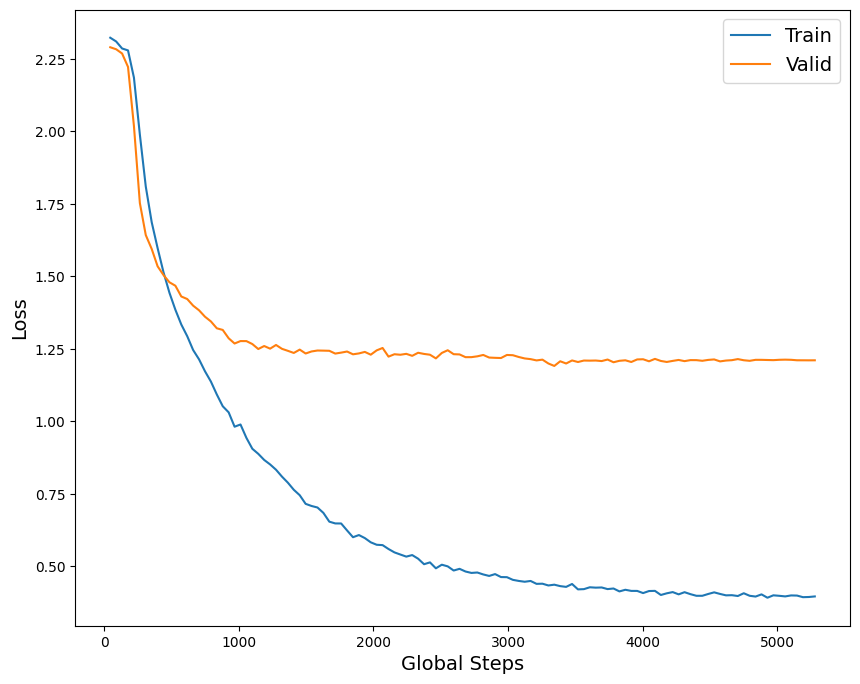

In [22]:
plt.figure(figsize=(10, 8))
train_loss_list, valid_loss_list, global_steps_list = load_metrics(output_path + '/metric.pkl')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.show() 

# Evaluation

In [23]:
# Evaluation Function
def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for (source, target), _ in test_loader:
                mask = (source != PAD_INDEX).type(torch.uint8)
                
                output = model(source, attention_mask=mask)

                y_pred.extend(torch.argmax(output, axis=-1).tolist())
                y_true.extend(target.tolist())
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8,9], digits=4))
    #cm=confusion_matrix(y_true, y_pred)
    
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8,9])
    ax = plt.subplot()

    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])
    ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])

Some weights of RobertaModel were not initialized from the model checkpoint at \\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.8182    0.9000        11
           1     0.8750    0.7778    0.8235         9
           2     0.7500    0.8182    0.7826        11
           3     1.0000    1.0000    1.0000        10
           4     0.8889    0.8889    0.8889         9
           5     1.0000    0.9000    0.9474        10
           6     0.9167    1.0000    0.9565        11
           7     0.8889    0.8889    0.8889         9
           8     0.8182    0.9000    0.8571        10
           9     0.8182    0.9000    0.8571        10

    accuracy                         0.8900       100
   macro avg     0.8956    0.8892    0.8902       100
weighted avg     0.8957    0.8900    0.8906       100



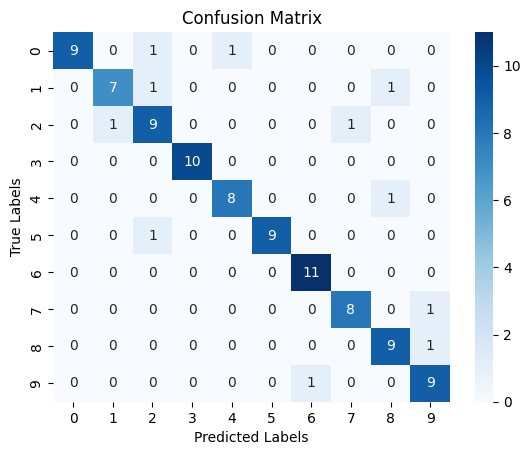

In [24]:
model = ROBERTAClassifier()
model = model.to(device)
load_checkpoint(output_path + '/model.pkl', model)
evaluate(model, valid_iter)

Some weights of RobertaModel were not initialized from the model checkpoint at \\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Classification Report:
              precision    recall  f1-score   support

           0     0.9726    0.9467    0.9595        75
           1     0.9091    0.8696    0.8889        69
           2     0.7838    0.8169    0.8000        71
           3     0.9531    0.9531    0.9531        64
           4     0.8714    0.9385    0.9037        65
           5     0.9385    0.8592    0.8971        71
           6     0.9524    1.0000    0.9756        80
           7     0.8710    0.8571    0.8640        63
           8     0.8636    0.8261    0.8444        69
           9     0.7838    0.8169    0.8000        71

    accuracy                         0.8897       698
   macro avg     0.8899    0.8884    0.8886       698
weighted avg     0.8910    0.8897    0.8898       698



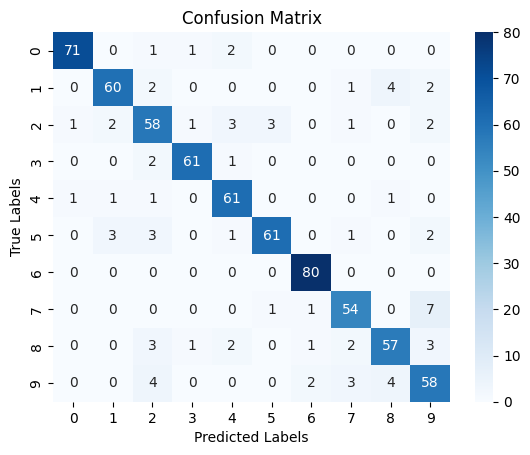

In [24]:
model = ROBERTAClassifier()
model = model.to(device)
load_checkpoint(output_path + '/model.pkl', model)
evaluate(model, train_iter)

Some weights of RobertaModel were not initialized from the model checkpoint at \\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        21
           1     0.9091    1.0000    0.9524        20
           2     0.8500    0.8500    0.8500        20
           3     1.0000    1.0000    1.0000        18
           4     0.9000    0.9474    0.9231        19
           5     0.9474    0.9000    0.9231        20
           6     0.9583    1.0000    0.9787        23
           7     0.9375    0.8333    0.8824        18
           8     0.8889    0.8000    0.8421        20
           9     0.8571    0.9000    0.8780        20

    accuracy                         0.9246       199
   macro avg     0.9248    0.9231    0.9230       199
weighted avg     0.9250    0.9246    0.9238       199



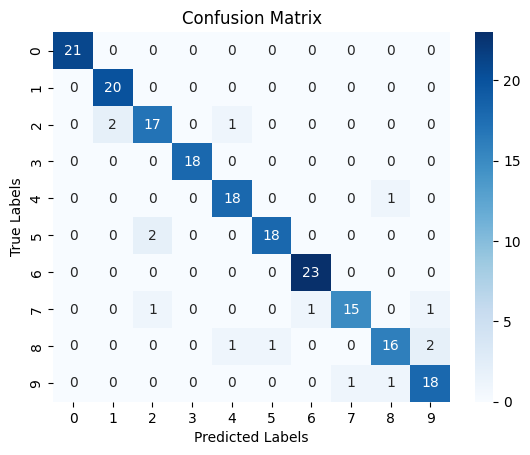

In [23]:
model = ROBERTAClassifier()
model = model.to(device)
load_checkpoint(output_path + '/model.pkl', model)
evaluate(model, test_iter)

In [27]:
#### output in terms of probability value
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Function to decode the input sentences from their encoded form
def decode_sentences(encoded_sentences, tokenizer):
    decoded_sentences = [tokenizer.decode(sentence, skip_special_tokens=True) for sentence in encoded_sentences]
    return decoded_sentences

# Evaluation Function
def evaluate(model, test_loader, tokenizer, output_excel):
    y_pred = []
    y_true = []
    input_sentences = []
    probabilities = []

    model.eval()
    with torch.no_grad():
        for (source, target), _ in test_loader:
            mask = (source != PAD_INDEX).type(torch.uint8)
            
            output = model(source, attention_mask=mask)
            
            # Store input sentences
            input_sentences.extend(source.tolist())
            
            # Calculate probabilities
            probs = torch.softmax(output, dim=-1)
            probabilities.extend(probs.tolist())
            
            y_pred.extend(torch.argmax(output, axis=-1).tolist())
            y_true.extend(target.tolist())
    
    # Decode the input sentences
    decoded_sentences = decode_sentences(input_sentences, tokenizer)
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8,9], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8,9])
    ax = plt.subplot()

    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])
    ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Input Sentence': decoded_sentences,
        'Actual Class': y_true,
        'Predicted Class': y_pred,
    })

    # Add probability columns for each class
    for i in range(10):
        results_df[f'Class {i} Probability'] = [prob[i] for prob in probabilities]

    # Save the DataFrame to an Excel file
    results_df.to_excel(output_excel, index=False)
    print(f"Results saved to {output_excel}")

# Example usage
# Assuming ROBERTAClassifier and other necessary components are defined elsewhere in the code.
# model = ROBERTAClassifier()
# model = model.to(device)
# load_checkpoint(output_path + '/model.pkl', model)
# tokenizer = ...  # Define your tokenizer here
# evaluate(model, valid_iter, tokenizer, 'evaluation_results.xlsx')



Some weights of RobertaModel were not initialized from the model checkpoint at \\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        21
           1     0.9524    1.0000    0.9756        20
           2     0.8636    0.9500    0.9048        20
           3     0.9444    0.9444    0.9444        18
           4     0.9000    0.9474    0.9231        19
           5     1.0000    0.8500    0.9189        20
           6     0.9583    1.0000    0.9787        23
           7     0.8750    0.7778    0.8235        18
           8     1.0000    0.8500    0.9189        20
           9     0.8261    0.9500    0.8837        20

    accuracy                         0.9296       199
   macro avg     0.9320    0.9270    0.9272       199
weighted avg     0.9333    0.9296    0.9292       199

Results saved to evaluation_results.xlsx


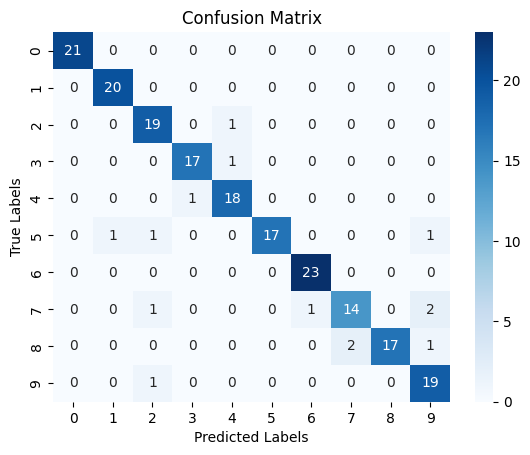

In [29]:
model = ROBERTAClassifier()
model = model.to(device)
load_checkpoint(output_path + '/model.pkl', model)
evaluate(model, test_iter, tokenizer, 'evaluation_results.xlsx')

In [ ]:
####Prediction for unknown data

In [ ]:
### 1. Class Prediction for Sentences in Excel File

import pandas as pd
import torch
from transformers import RobertaTokenizer

# Load the trained model
model_path = r"C:\Users\KPA2877\Documents\model.pkl"
model = ROBERTAClassifier()
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu'))['model_state_dict'])
model.eval()

# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained(r"\\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base")

# Load the Excel file
input_file = r"Clean_Sentence_Split.xlsx"
df = pd.read_excel(input_file)

# Preprocess the sentences
def process_sentence(sentence):
    
    doc = nlp(sentence)  # Process the sentence with SpaCy
    cleaned_tokens = []   # Initialize an empty list to store modified tokens
    for token in doc:
        # Check if the token is not a name, organization, or location
        if token.ent_type_ not in ['PERSON', 'ORG', 'GPE']:
            # If not, add the token text to the cleaned_tokens list
            cleaned_tokens.append(token.text)
    cleaned_sentence = ' '.join(cleaned_tokens)  # Join the cleaned tokens back into a string
    return cleaned_sentence
   
   
def preprocess_text(text):
# Convert text to lowercase and strip whitespace
    text = text.lower().strip()
    # Remove hyperlinks
    text = re.sub(r'<a\s+(?:[^>]*?\s+)?href=(["\'])(.*?)\1[^>]*>(.*?)</a>', r'\3', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z .,!?]', '', text)   
    text=text.strip()
    # Apply SpaCy processing to the text
    cleaned_text = process_sentence(text)
   
    return cleaned_text

df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Tokenize and predict
def predict(sentence):
    inputs = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_tensors='pt'
    )
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, prediction = torch.max(outputs, dim=1)
    
    return "Expedite" if prediction.item() == 1 else "Non Expedite"

df['Prediction'] = df['Sentence'].apply(predict)
df.to_excel(r"path_to_save_predictions2.xlsx", index=False)

In [32]:
import pandas as pd
import torch
from transformers import RobertaTokenizer
import re
import spacy

# Load the SpaCy model for named entity recognition
#nlp = spacy.load("en_core_web_sm")

# Load the trained model
model_path = r"C:\Users\KPA2877\Documents\model.pkl"
model = ROBERTAClassifier()
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu'))['model_state_dict'])
model.eval()

# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained(r"\\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base")

# Load the Excel file
input_file = r"Clean_Sentence_Val.xlsx"
df = pd.read_excel(input_file)

# Preprocess the sentences
def process_sentence(sentence):
    doc = nlp(sentence)  # Process the sentence with SpaCy
    cleaned_tokens = []   # Initialize an empty list to store modified tokens
    for token in doc:
        # Check if the token is not a name, organization, or location
        if token.ent_type_ not in ['PERSON', 'ORG', 'GPE']:
            # If not, add the token text to the cleaned_tokens list
            cleaned_tokens.append(token.text)
    cleaned_sentence = ' '.join(cleaned_tokens)  # Join the cleaned tokens back into a string
    return cleaned_sentence

def preprocess_text(text):
    # Convert text to lowercase and strip whitespace
    text = text.lower().strip()
    # Remove hyperlinks
    text = re.sub(r'<a\s+(?:[^>]*?\s+)?href=(["\'])(.*?)\1[^>]*>(.*?)</a>', r'\3', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z .,!?]', '', text)   
    text = text.strip()
    # Apply SpaCy processing to the text
    cleaned_text = process_sentence(text)
   
    return cleaned_text

df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Tokenize and predict
def predict(sentence):
    inputs = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_tensors='pt'
    )
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs, dim=-1).squeeze().tolist()
        _, prediction = torch.max(outputs, dim=1)
    
    return prediction.item(), probs

# Predict and store results in DataFrame
predictions = []
probabilities = []

for sentence in df['Sentence']:
    pred_class, probs = predict(sentence)
    predictions.append(pred_class)
    probabilities.append(probs)

df['Predicted Class'] = predictions

# Add probability columns for each class
for i in range(10):
    df[f'Class {i} Probability'] = [prob[i] for prob in probabilities]

# Save the DataFrame to an Excel file
output_file = r"path_to_save_predictions2_Val.xlsx"
df.to_excel(output_file, index=False)

print(f"Results saved to {output_file}")


Some weights of RobertaModel were not initialized from the model checkpoint at \\rsc.humad.com\rdrive\FinRec\FRSolutions\FRS Reporting\RXS Information\Financial Reporting\Forecast Research Dashboard\Data Science\Member_grievance\Abhirup\Model\roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Results saved to path_to_save_predictions2_Val.xlsx


# Inference

In [ ]:
# Model with extra layers on top of RoBERTa
class ROBERTAClassifier(torch.nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(ROBERTAClassifier, self).__init__()
        
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        self.d1 = torch.nn.Dropout(dropout_rate)
        self.l1 = torch.nn.Linear(768, 64)
        self.bn1 = torch.nn.LayerNorm(64)
        self.d2 = torch.nn.Dropout(dropout_rate)
        self.l2 = torch.nn.Linear(64, 5)
        
    def forward(self, input_ids, attention_mask):
        _, x = self.roberta(input_ids=input_ids, attention_mask=attention_mask,return_dict=False)
        x = self.d1(x)
        x = self.l1(x)
        x = self.bn1(x)
        x = torch.nn.Tanh()(x)
        x = self.d2(x)
        x = self.l2(x)
        
        return x  

In [ ]:
t1=time.time()
def load_checkpoint(path, model):    
    state_dict = torch.load(path, map_location=device)
    model.load_state_dict(state_dict['model_state_dict'])   
    return model,state_dict['valid_loss']

model = ROBERTAClassifier()
model = model.to(device)
saved_model_path = output_path + '/model.pkl'  # Adjust this according to your setup
loaded_model, _ = load_checkpoint(saved_model_path,model)

# Load pre-trained model tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
t2=time.time()
t2-t1

In [ ]:
txt=pd.read_excel(r"C:\RSS\jyothi\classification\train_data_03_04_24.xlsx")
sentences=list(txt['sentences'])

In [ ]:
sentences

In [ ]:
# Define a function to predict sentences in batches
def predict_sentences_batch(model, tokenizer, sentences, batch_size=32):
    predicted_labels = []
    dataloader = DataLoader(sentences, batch_size=batch_size)

    for batch in dataloader:
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128)
        with torch.no_grad():
            outputs = model(**inputs)
        predicted_labels.extend(torch.argmax(outputs, dim=-1).tolist())
    return predicted_labels

t1 = time.time()
predicted_labels = predict_sentences_batch(loaded_model, tokenizer, sentences)
t2 = time.time()
print("Time taken:", t2 - t1)

In [ ]:
#avg time / sentence
(t2-t1)/950

In [ ]:
len(predicted_labels)